In [ ]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.19.0


creating data to view and fit

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

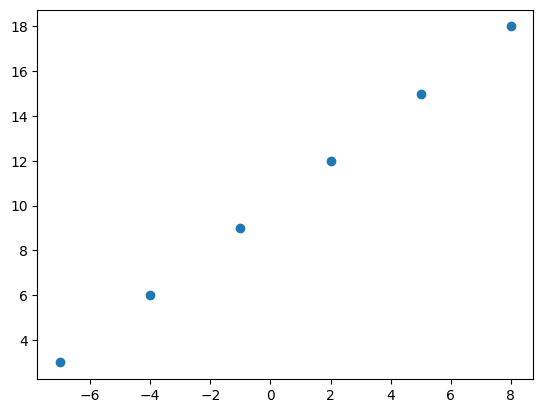

In [ ]:
# create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0])

# visualize
plt.scatter(x,y);

In [ ]:
y == x + 10

array([ True,  True,  True,  True,  True,  True])

Input and output shapes

In [ ]:
hinfo =tf.constant(["bedroom","bathroom","garage"])
price = tf.constant([939700])
hinfo, price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = x.shape
output_shape = y.shape
input_shape, output_shape

((6,), (6,))

In [ ]:
x[0], y[1]

(np.float64(-7.0), np.float64(6.0))

In [ ]:
input_shape = x[0].shape
output_shape = y[1].shape
input_shape, output_shape

((), ())

In [ ]:
x[2].ndim

0

Turn our numpy arrays into tensors

In [ ]:
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [ ]:
input_shape = x[0].shape
output_shape =y[1].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

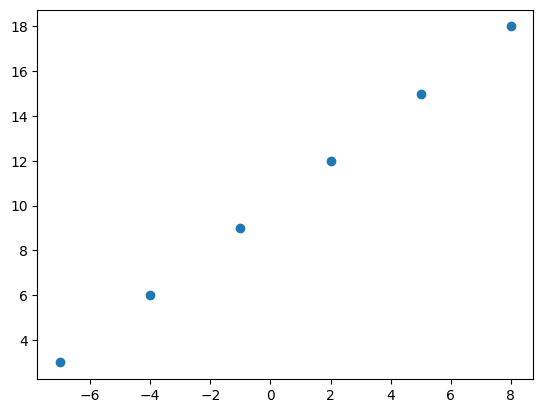

In [ ]:
plt.scatter(x,y)

steps in modelling with tensorflow

1.creating the model
2.compiling a model
3.fitting the model

In [ ]:
tf.random.set_seed(42)

#create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation ='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=["mae"])

# fit the model
model.fit(x, y, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.6602 - mae: 9.6602
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 9.5077 - mae: 9.5077
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 9.3934 - mae: 9.3934
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 9.2819 - mae: 9.2819
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 9.1684 - mae: 9.1684


In [ ]:
x, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [ ]:
#try and make a prdeiction using our model
y_pred = model.predict([x == 7.0])
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(6,))',)
  warnings.warn(msg)


array([[0.06210002],
       [0.06210002],
       [0.06210002],
       [0.06210002],
       [0.06210002],
       [0.06210002]], dtype=float32)

In [ ]:
y_pred + 10

array([[10.0621],
       [10.0621],
       [10.0621],
       [10.0621],
       [10.0621],
       [10.0621]], dtype=float32)

Improving our model

1. creating the model : add more layers, increase the no. of hidden units(all called neurons), each of the hidden layer, change the activaton function of the each layer.
2.compiling the model: change the optimization function.
3. fitting the model: fit a model for more epochs

In [ ]:
#create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation ='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=["mae"])

# fit the model
model.fit(x, y, epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step - loss: 11.2416 - mae: 11.2416
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 11.0510 - mae: 11.0510
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 10.8622 - mae: 10.8622
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 10.6748 - mae: 10.6748
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 10.4883 - mae: 10.4883
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 10.3023 - mae: 10.3023
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 10.1164 - mae: 10.1164
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 9.9303 - mae: 9.9303
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 9.7434 - mae: 9.7434
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 9.5554 - mae: 9.5554
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 9.3659 - mae: 9.3659
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 9.1744 - mae: 9.1744
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
x, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [ ]:
model.predict(tf.constant([[3.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[7.461901]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation =None, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss="mae", #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=["mae"])

# fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - loss: 10.4745 - mae: 10.4745
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.4353 - mae: 10.4353
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.3960 - mae: 10.3960
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.3567 - mae: 10.3567
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10.3174 - mae: 10.3174
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.2780 - mae: 10.2780
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.2385 - mae: 10.2385
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 10.1989 - mae: 10.1989
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.1592 - mae: 10.1592
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.1194 - mae: 10.1194
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.0795 - mae: 10.0795
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.0394 - mae: 10.0394
Epoch 13/100
1/1 ━━━━━━

In [ ]:
x, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [ ]:
model.predict(tf.constant([[3.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[9.614505]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation =None, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss="mae", #mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step - loss: 10.5082 - mae: 10.5082
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.3501 - mae: 10.3501
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.1903 - mae: 10.1903
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 10.0271 - mae: 10.0271
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 9.8586 - mae: 9.8586
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.6834 - mae: 9.6834
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.5002 - mae: 9.5002
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.3078 - mae: 9.3078
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.1049 - mae: 9.1049
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.8903 - mae: 8.8903
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.6625 - mae: 8.6625
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.4206 - mae: 8.4206
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
x, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [ ]:
model.predict(tf.constant([[3.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[12.966422]], dtype=float32)

Evaluating the model

build a model => fit a model => evaluate model => tweak a model => fit => evaluate

In [ ]:
x = tf.range(-100, 100, 4)

y = x + 10

x, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

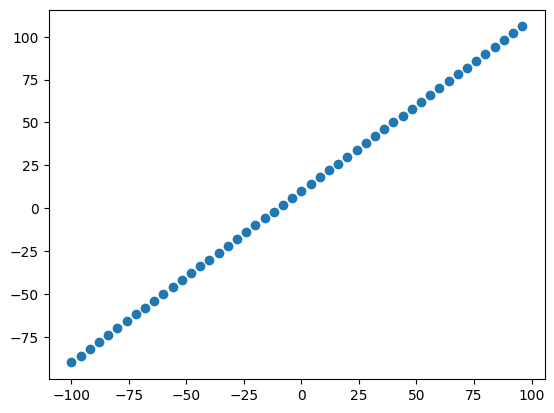

In [ ]:
#visualize
plt.scatter(x,y);

The 3 sets

1. training set : model learns from the data, typically 70-80% of the total data available.
2. validation set: model gets tuned on this data, typically 10-15% of the data available.
3. test set: model uses evaluated on this data to test, what is learned, this set is typically 10-15% of the total data available.

In [ ]:
len(x)

50

In [ ]:
# split the data into train and test sets

x_train =x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

len(x_train), len(x_test), len(y_train),len(y_test)

(40, 10, 40, 10)

visualing the data

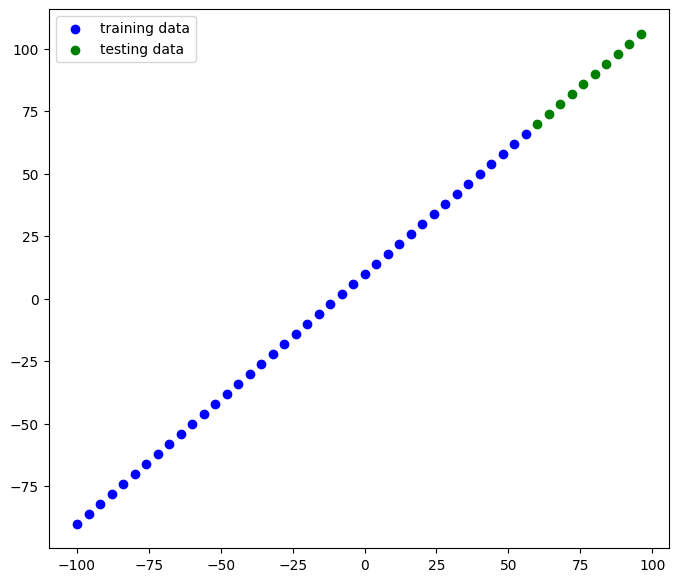

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(x_train, y_train, c="b", label="training data")
plt.scatter(x_test, y_test, c="g", label="testing data")
plt.legend();

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name= "one of many models we're going o build...")

#compile the model
model.compile(loss="mae", #mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit the model
# model.fit(x_train, y_train, epochs=100)

visualizing the model

total params - total no. of parameter in the model.
trainable parameter: these are parameter(patterns) the model can update as it trains.
non-trainable params - thses parameters arent updated during training.

In [ ]:
model.summary()

Model: "one of many models we're going o build..."

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.build()

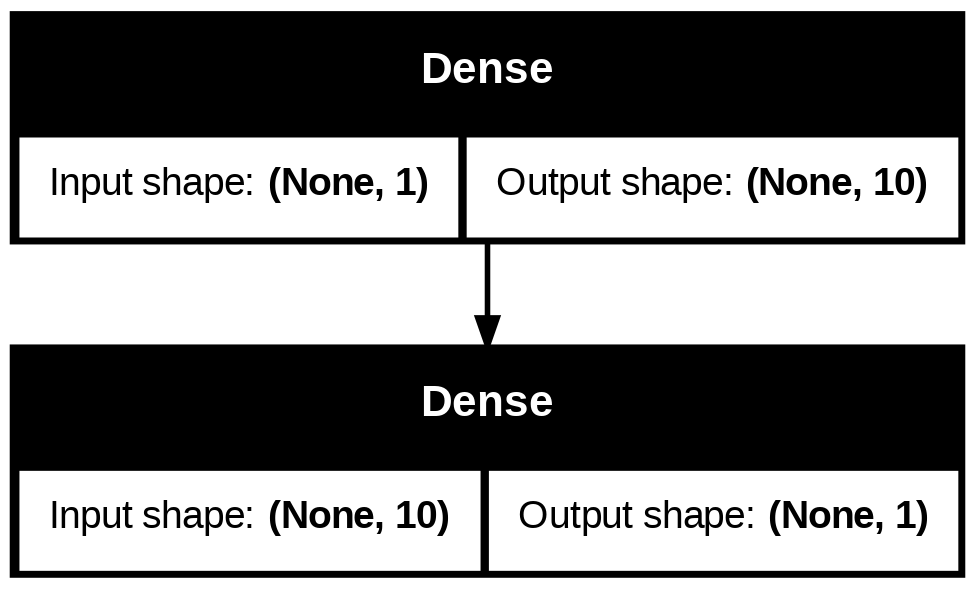

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

visualize with prediction

In [ ]:
y_pred = model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[-5.950477 ],
       [-6.347177 ],
       [-6.7438784],
       [-7.140572 ],
       [-7.537277 ],
       [-7.933967 ],
       [-8.330668 ],
       [-8.727371 ],
       [-9.1240635],
       [-9.5207615]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# lets create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="training data")
  plt.scatter(test_data, test_labels, c="g", label="testing data")
  plt.scatter(test_data, predictions, c="r", label="predictions")
  plt.legend();

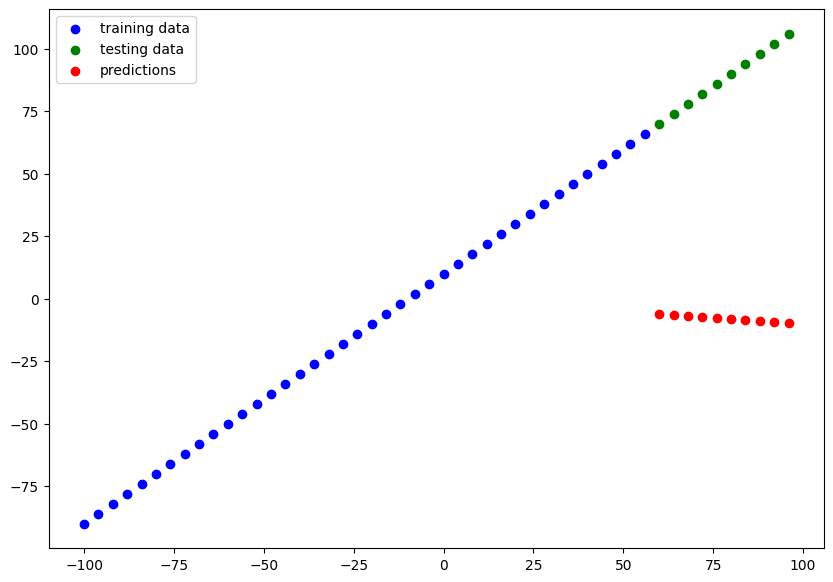

In [ ]:
plot_predictions()

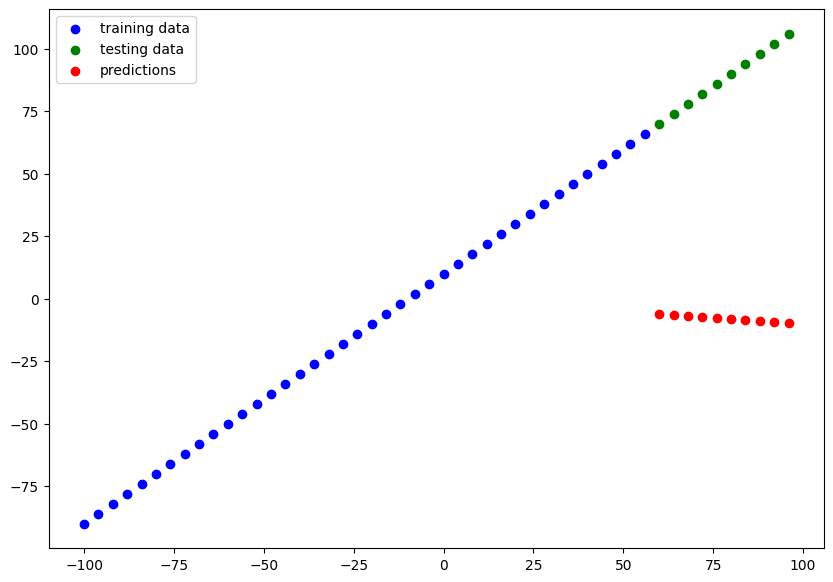

In [ ]:
plot_predictions(train_data = x_train,
                 train_labels=y_train,
                 test_data=x_test,
                 test_labels=y_test,
                 predictions=y_pred)

Evaluating our models predictions

In [ ]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - loss: 95.7356 - mae: 95.7356


[95.73562622070312, 95.73562622070312]

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# create the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
print(mae)


AttributeError: module 'keras._tf_keras.keras.metrics' has no attribute 'mean_absolute_error'

In [ ]:

y_pred

array([[-5.950477 ],
       [-6.347177 ],
       [-6.7438784],
       [-7.140572 ],
       [-7.537277 ],
       [-7.933967 ],
       [-8.330668 ],
       [-8.727371 ],
       [-9.1240635],
       [-9.5207615]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-5.950477 , -6.347177 , -6.7438784, -7.140572 , -7.537277 ,
       -7.933967 , -8.330668 , -8.727371 , -9.1240635, -9.5207615],
      dtype=float32)>

In [ ]:
# calculate mean absolute error
# mae = tf.keras.metrics.MeanAbsoluteError(y_true=y_test, y_pred=tf.squeeze(y_pred))
# mae

# Mean Absolute Error
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test, tf.squeeze(y_pred))
print("Mean Absolute Error:", mae.result().numpy())

Mean Absolute Error: 95.73563


In [ ]:
# create a mean squared error
# mae = tf.keras.metrics.MeanSquaredError(y_true=y_test, y_pred=tf.squeeze(y_pred))
# mae

# Mean Squared Error
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_test, tf.squeeze(y_pred))
print("Mean Squared Error:", mse.result().numpy())

Mean Squared Error: 9324.789


In [ ]:
#set random seed
tf.random.set_seed(42)

#create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])
#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 49.9117 - mae: 49.9117 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 16.7872 - mae: 16.7872
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.4160 - mae: 10.4160
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.0184 - mae: 8.0184
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.6740 - mae: 9.6740
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.0005 - mae: 8.0005
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.6624 - mae: 9.6624
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.9827 - mae: 7.9827
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.6508 - mae: 9.6508
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.9648 - mae: 7.9648
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.6392 - mae: 9.6392
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.9470 - mae: 7.9470
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


ValueError: x and y must be the same size

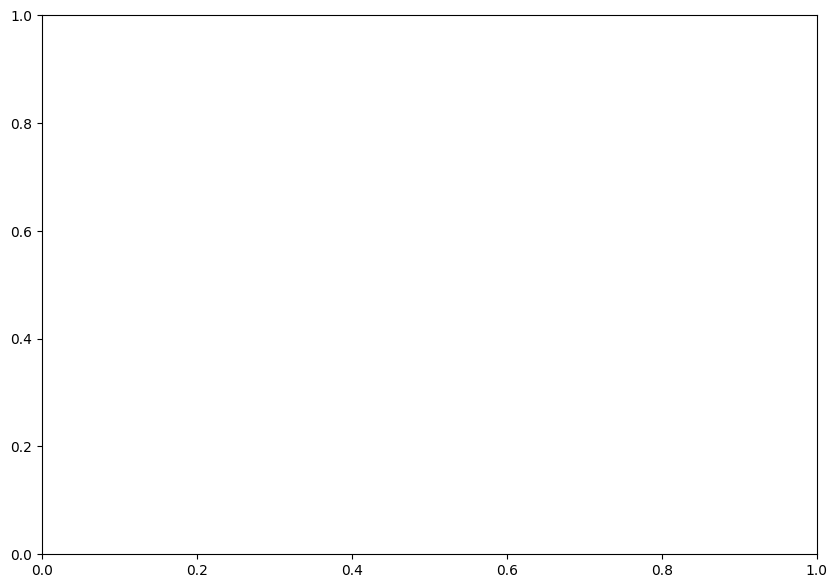

In [ ]:
y_pred1=model.predict(x_test)
plot_predictions(y_pred1)

In [ ]:
tf.constant(y_pred1), tf.squeeze(y_pred1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[49.63518 ],
        [52.85065 ],
        [56.06612 ],
        [59.28159 ],
        [62.497063],
        [65.712524],
        [68.928   ],
        [72.14347 ],
        [75.35894 ],
        [78.57441 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([49.63518 , 52.85065 , 56.06612 , 59.28159 , 62.497063, 65.712524,
        68.928   , 72.14347 , 75.35894 , 78.57441 ], dtype=float32)>)

In [ ]:

#calculate model1 evaluation metrics
mae1 = mae(y_test, tf.squeeze(y_pred1))
mse1 = mse(y_test, tf.squeeze(y_pred1))
mae1, mse1
# mae1 = mae(y_test,y_pred1)
# mse1 = mse(y_test, y_pred1)
# mae1, mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=59.81541442871094>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4950.423828125>)

build model2
2 dense layer, trained for 100 epochs

In [ ]:
#set random seed
tf.random.set_seed(42)

#create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])
#compile the model
model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

#fit the model
model2.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 71.2227 - mse: 7483.0044 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 34.1053 - mse: 1686.7230
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.3202 - mse: 159.7995
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.4342 - mse: 394.9377
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.9104 - mse: 138.0772
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.2256 - mse: 173.4805
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.5230 - mse: 244.4538
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 16.7044 - mse: 404.5509
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.5444 - mse: 119.8426
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.5492 - mse: 124.5849
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.5941 - mse: 150.6018
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.6895 - mse: 200.4223
Epoch 13/10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


ValueError: x and y must be the same size

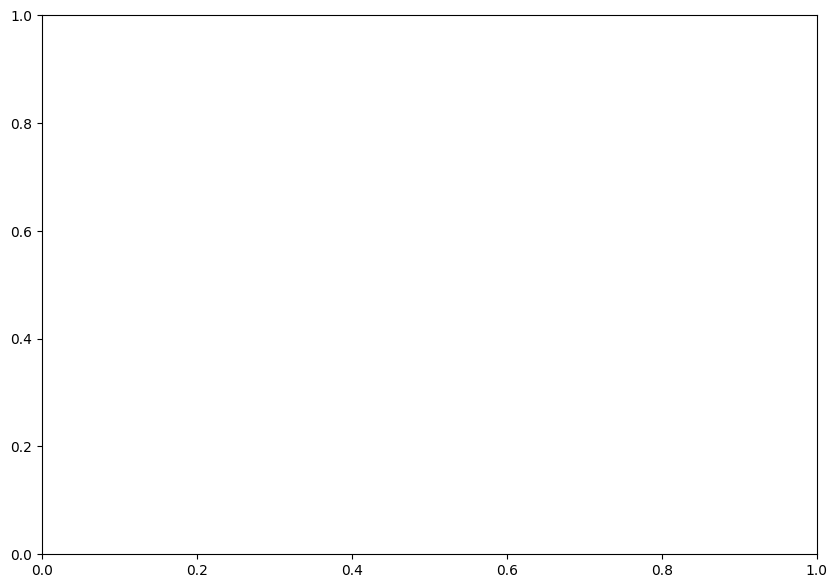

In [ ]:
#make and plot predictions of model2
y_pred2 = model2.predict(x_test)
plot_predictions(y_pred2)

In [ ]:
# calculated model2 evaluation metrics
mae2 = mae(y_test, tf.squeeze(y_pred2))
mse2 = mse(y_test, tf.squeeze(y_pred2))
mae2, mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=50.97855758666992>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3674.6455078125>)

In [ ]:
#set random seed
tf.random.set_seed(42)

#create the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])
#compile the model
model3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

#fit the model
model3.fit(x_train, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 55.4823 - mse: 4274.4292 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 38.6326 - mse: 2055.4067
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 30.6194 - mse: 1295.6517
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 16.6569 - mse: 438.1643
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 19.0749 - mse: 493.5090
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 17.4810 - mse: 415.9733
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 16.8757 - mse: 386.1838
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.7316 - mse: 220.9435
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 14.4804 - mse: 292.3583
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.9515 - mse: 342.5774
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.0246 - mse: 218.2324
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.0323 - mse: 309.6799
Epoch 13/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


ValueError: x and y must be the same size

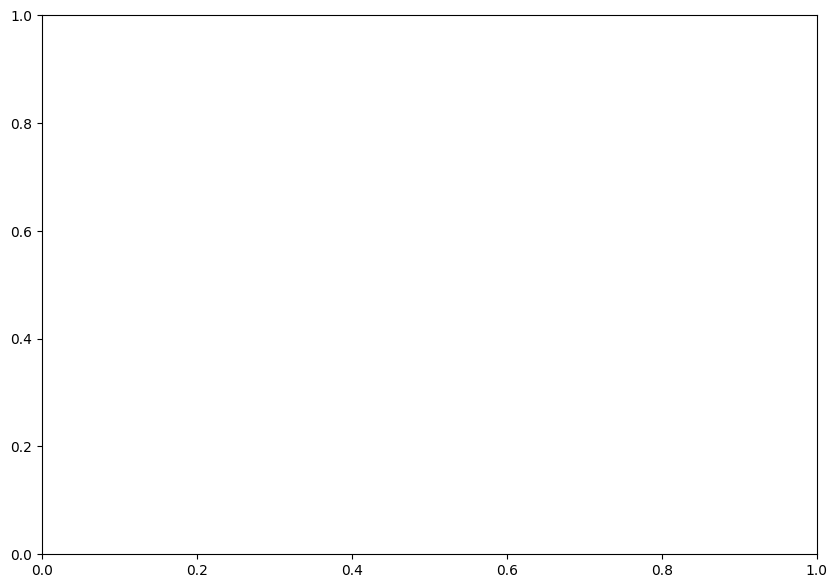

In [ ]:
#make and plot predictions of model2
y_pred3 = model2.predict(x_test)
plot_predictions(y_pred3)

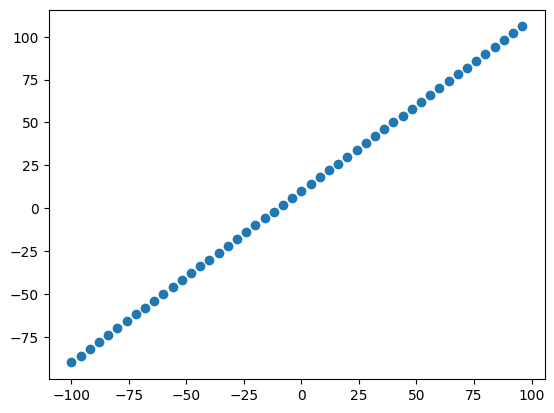

In [ ]:
plt.scatter(x, y)


In [ ]:
y_pred3 = tf.squeeze(y_pred3)
y_pred3

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([42.531376, 45.234444, 47.93751 , 50.640575, 53.34364 , 56.0467  ,
       58.74976 , 61.45283 , 64.15589 , 66.85896 ], dtype=float32)>

In [ ]:
y_pred3 = y_pred3[:len(y_test)]
y_pred3

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([42.531376, 45.234444, 47.93751 , 50.640575, 53.34364 , 56.0467  ,
       58.74976 , 61.45283 , 64.15589 , 66.85896 ], dtype=float32)>

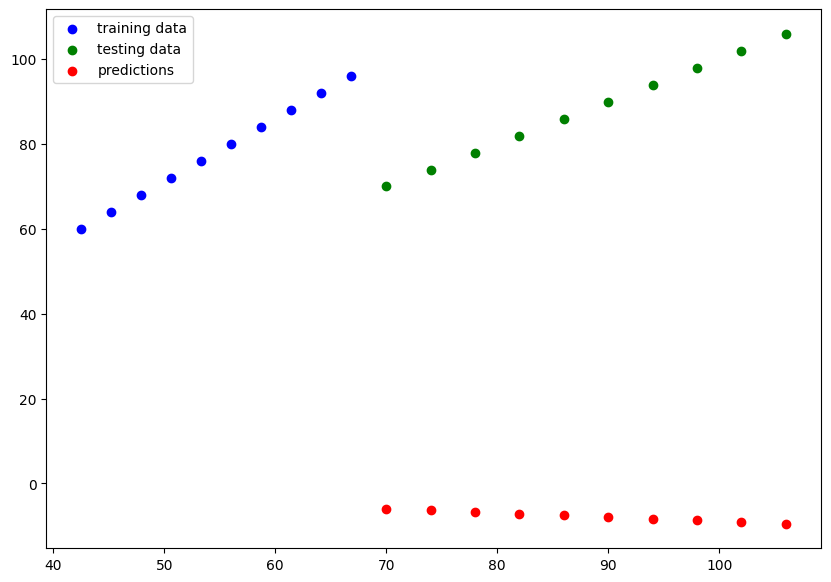

In [ ]:
plot_predictions(y_pred3,x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


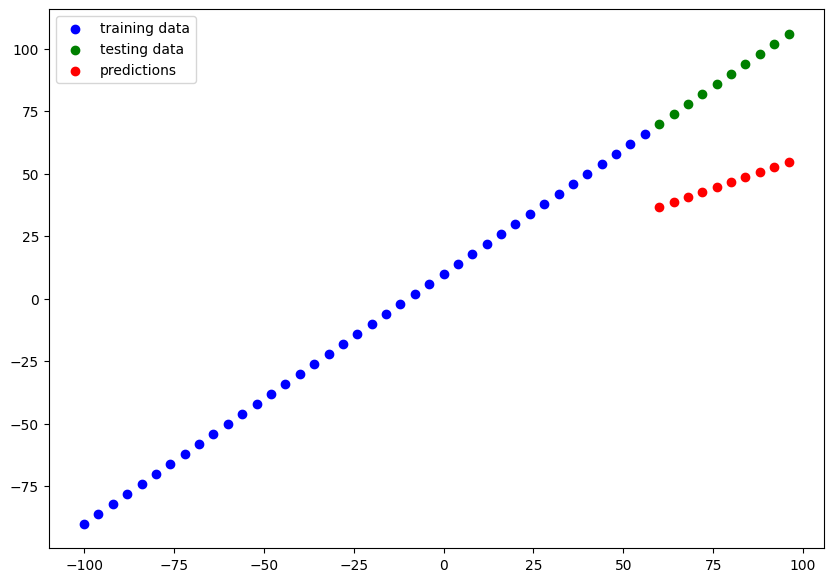

In [ ]:
y_pred3 = model3.predict(x_test)
plot_predictions(predictions=y_pred3)


In [ ]:
mae3 = mae(y_test, tf.squeeze(y_pred3))
mse3 = mse(y_test, tf.squeeze(y_pred3))
mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=48.822845458984375>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3212.498046875>)

In [ ]:
# comparing the results of our experiments
import pandas as pd
model_results = [["model_1",mae1.numpy(), mse1.numpy()],
                 ["model_2",mae2.numpy(), mse2.numpy()],
                 ["model_3",mae3.numpy(), mse3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,59.815414,4950.423828
1,model_2,50.978558,3674.645508
2,model_3,48.822845,3212.498047


In [ ]:
model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Tracking your experiments
1. tensorboard = help track modelling experiments.
2. weights&biases = kinds of ml experiments.


saving ourr models
1. the savedmodel format
2. the HDF5 format

In [ ]:
# model2.save("best_model_savemodel_ever")
model2.save("best_model_savemodel_ever.keras")


In [ ]:
# save model using the hdf5 format
model2.save("best_model_hdf5_ever.h5")

Loading the model

In [ ]:
loaded_savemodel = tf.keras.models.load_model("best_model_savemodel_ever.keras")
loaded_savemodel

<Sequential name=sequential_5, built=True>

In [ ]:
loaded_h5_model = tf.keras.models.load_model("best_model_hdf5_ever.h5")
loaded_h5_model

<Sequential name=sequential_5, built=True>

In [ ]:
loaded_savemodel.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model2_preds = model2.predict(x_test)
loaded_savemodel_preds = loaded_savemodel.predict(x_test)
model2_preds == loaded_savemodel

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [ ]:
model2_preds== loaded_savemodel_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model2_preds, loaded_savemodel_preds

(array([[42.531376],
        [45.234444],
        [47.93751 ],
        [50.640575],
        [53.34364 ],
        [56.0467  ],
        [58.74976 ],
        [61.45283 ],
        [64.15589 ],
        [66.85896 ]], dtype=float32),
 array([[42.531376],
        [45.234444],
        [47.93751 ],
        [50.640575],
        [53.34364 ],
        [56.0467  ],
        [58.74976 ],
        [61.45283 ],
        [64.15589 ],
        [66.85896 ]], dtype=float32))

In [ ]:
mae(y_true =y_test, y_pred=model2_preds) == mae(y_true=y_test, y_pred =loaded_savemodel_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [ ]:
model2_preds.squeeze()

array([42.531376, 45.234444, 47.93751 , 50.640575, 53.34364 , 56.0467  ,
       58.74976 , 61.45283 , 64.15589 , 66.85896 ], dtype=float32)

In [ ]:
model2_preds = model2.predict(x_test)
loaded_h5_model_preds = loaded_h5_model.predict(x_test)
model2_preds == loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

Download a model(or any other file)
1. you go to files tab and right click on the files you're after and click download.
2. use code

In [ ]:
from google.colab import files
files.download("best_model_hdf5_ever.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#save a file from google colab to google drive
!cp //content/best_model_hdf5_ever.h5 /content/drive/MyDrive/tensorflow

In [ ]:
!ls /content/drive/MyDrive/tensorflow

best_model_hdf5_ever.h5


A larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance['age'], insurance['bmi']

(0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64,
 0       27.900
 1       33.770
 2       33.000
 3       22.705
 4       28.880
          ...  
 1333    30.970
 1334    31.920
 1335    36.850
 1336    25.800
 1337    29.070
 Name: bmi, Length: 1338, dtype: float64)

In [ ]:
#try one-hot encoding our dataframe so its all numbers
a =pd.get_dummies(insurance)
a.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
# create x and y values(features and labels)
x = a.drop("charges", axis=1)
y = a["charges"]
x, y
# view
x.head(), y.head()


(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0        True     False      False        True   
 1   18  33.770         1       False      True       True       False   
 2   28  33.000         3       False      True       True       False   
 3   33  22.705         0       False      True       True       False   
 4   32  28.880         0       False      True       True       False   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0             False             False             False              True  
 1             False             False              True             False  
 2             False             False              True             False  
 3             False              True             False             False  
 4             False              True             False             False  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [ ]:
# create training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x),len(x_train), len(x_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10006.6816 - mae: 10006.6816
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7715.8716 - mae: 7715.8716
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7545.3516 - mae: 7545.3516
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7370.8198 - mae: 7370.8198
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7833.4688 - mae: 7833.4688
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7938.3384 - mae: 7938.3384
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7843.9956 - mae: 7843.9956
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7305.4883 - mae: 7305.4883
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7266.8027 - mae: 7266.8027
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7382.3047 - mae: 7382.3047
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7696.1221 - mae: 7696.1221
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
# check the results of the insurance model on the test data
insurance_model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8041.0122 - mae: 8041.0122  


[8006.24462890625, 8006.24462890625]

In [ ]:
y_train.median(), y_train.mean()

NameError: name 'y_train' is not defined

# improve the model
1.add an extra layer with more hidden units
2.train for longer
3.(insert your own experiment here)

In [ ]:
tf.random.set_seed(42)

insurance_model2 = tf.keras.Sequential([
    # tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model2.fit(x_train, y_train, epochs=100, verbose=1)

NameError: name 'x_train' is not defined

In [ ]:
insurance_model2.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7964.1143 - mae: 7964.1143  


[7928.626953125, 7928.626953125]

In [ ]:
insurance_model.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8041.0122 - mae: 8041.0122 


[8006.24462890625, 8006.24462890625]

In [ ]:
tf.random.set_seed(42)

insurance_model3 = tf.keras.Sequential([
    # tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

history = insurance_model3.fit(x_train, y_train, epochs=200)

NameError: name 'x_train' is not defined

In [ ]:
 insurance_model3.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6104.7812 - mae: 6104.7812  


[5937.4111328125, 5937.4111328125]

In [ ]:
insurance_model.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8041.0122 - mae: 8041.0122 


[8006.24462890625, 8006.24462890625]

Text(0.5, 0, 'epochs')

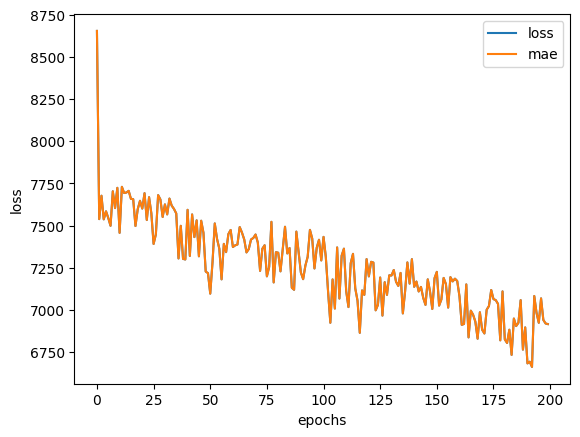

In [ ]:
# plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


preprocessing data (normalization , standarization)

In [ ]:
x

NameError: name 'x' is not defined

<Axes: ylabel='Frequency'>

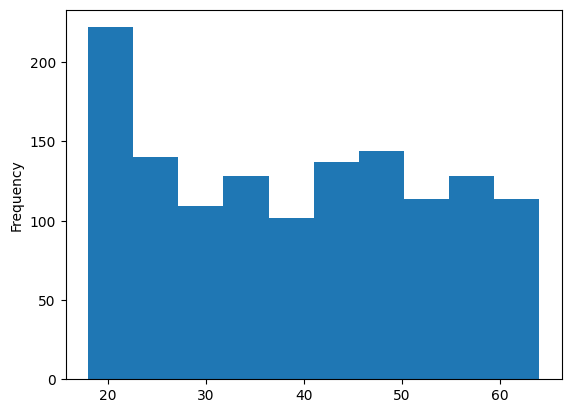

In [ ]:
x['age'].plot(kind="hist")

<Axes: ylabel='Frequency'>

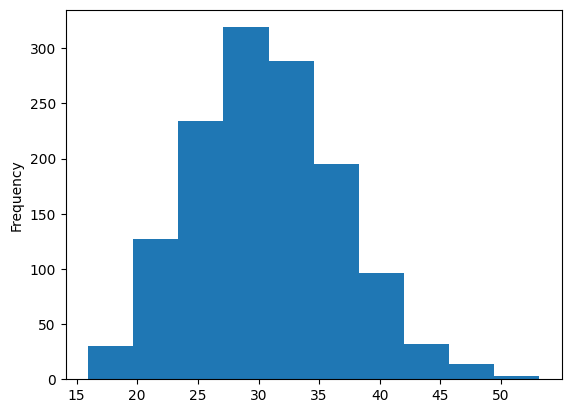

In [ ]:
x['bmi'].plot(kind="hist")

In [ ]:
# reading data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


TO prepare our data, we can borrow a few classes from scikit-learn

In [ ]:
from sklearn. compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer((MinMaxScaler(),["age","bmi","children"]),
                             (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))

# create x and y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

# build our train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# fit the column transformer to our training data
ct.fit(x_train)

# transform training and test data with normalization and Onehotencoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


NameError: name 'insurance' is not defined

In [ ]:
x_train.loc[0]

NameError: name 'x_train' is not defined

In [ ]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
tf.random.set_seed(42)

insurance_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model4.fit(x_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13294.1816 - mae: 13294.1816
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12033.9258 - mae: 12033.9258
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6173.9434 - mae: 6173.9434
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5944.2461 - mae: 5944.2461
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5482.4727 - mae: 5482.4727
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5229.4702 - mae: 5229.4702
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5438.5283 - mae: 5438.5283
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5291.1792 - mae: 5291.1792
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5342.4521 - mae: 5342.4521
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5606.9043 - mae: 5606.9043
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4863.5557 - mae: 4863.5557
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [ ]:
insurance_model4.evaluate(x_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7242.5781 - mae: 7242.5781  


[7066.5546875, 7066.5546875]

Introduction to neural network classification with tensorflow.
1. binary classification
2. multiclass classification
3. multilabel classification

In [ ]:
# create data to view and fit

from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check out labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"x0":x[:,0], "x1":x[:,1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles["label"].value_counts()

,count
label,
1,500
0,500


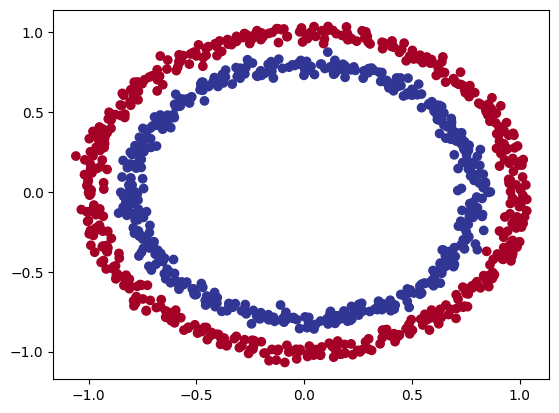

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0], y=x[:,1], c=y, cmap=plt.cm.RdYlBu)

Input and Output shapes

In [ ]:
x.shape, y.shape  #check the shapes of features and labels

((1000, 2), (1000,))

In [ ]:
# how many samples we're working
len(x), len(y)

(1000, 1000)

In [ ]:
# view the first example of features and label
x[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

steps in modelling
1. create a model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate

In [ ]:
import tensorflow as tf


In [ ]:
tf.random.set_seed(42)
# create a model
m1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile
m1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
          optimizer=tf.keras.optimizers.SGD(),
          metrics=["accuracy"])

# fit the model
m1.fit(x, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4639 - loss: 6.6058
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4285 - loss: 6.0771
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4413 - loss: 5.2135 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4389 - loss: 4.8535
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4421 - loss: 4.2642 


In [ ]:
# lets try and improve our model by training
m1.fit(x, y, epochs=100, verbose=0)
m1.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

In [ ]:
tf.random.set_seed(42)
# create a model
m2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile
m2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
          optimizer=tf.keras.optimizers.SGD(),
          metrics=["accuracy"])

# fit the model
m2.fit(x, y, epochs=10, verbose=0)

In [ ]:
m2.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059046745300293, 0.5]

In [ ]:
# improving model

tf.random.set_seed(42)
# create a model
m3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
m3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
          optimizer=tf.keras.optimizers.SGD(),
          metrics=["accuracy"])

# fit the model
m3.fit(x, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4427 - loss: 1.5376
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4655 - loss: 0.7030
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4733 - loss: 0.7029
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4733 - loss: 0.7029
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4694 - loss: 0.7029


In [ ]:
m2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
m3.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5111 - loss: 0.6933  


[0.6958702206611633, 0.4959999918937683]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


(-1.1677683182718437, 1.1360036756154805)

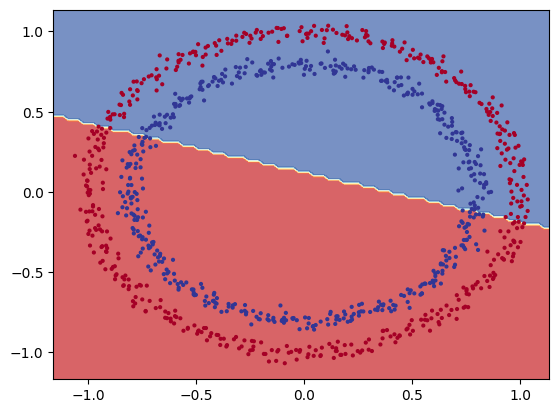

In [ ]:
import numpy as np
def plot_decision_boundary(m3, x, y):
  """
  Plots the decision boundary created by a model predicting x_test
  """

    # define the axis boundaries of the plot and create a meshgrid
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100))

    # create x value
x_in = np.c_[xx.ravel(), yy.ravel()]

    # make predictions
y_pred = m3.predict(x_in)

    # check for multi-class
if len(y_pred[0]) > 1:
  print("doing multiclass classification")
  y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
else:
  print("doing binary classification")
  y_pred = np.round(y_pred).reshape(xx.shape)

# plotting
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(x[:, 0], x[:, 1], c=y, s=4, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

[]

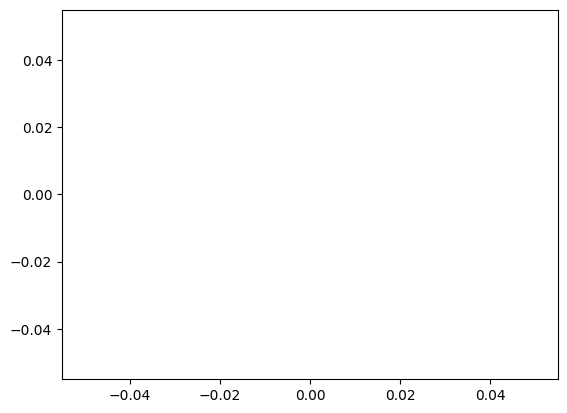

In [ ]:
plot_decision_boundary( m3,
                       x,
                       y)
plt.plot()

In [ ]:
tf.random.set_seed(42)
x_regression = tf.range(0,1000,5)
x_regression = tf.range(100,1100,5) #y =x+100

# split our regression data into training and test data
x_reg_train = x_regression[:70]
x_reg_test = x_regression[70:]
y_reg_train = x_reg_train + 100
y_reg_test = x_reg_test + 100

# fit our model to the regression data
m3.fit(x_reg_train, y_reg_train, epochs=100)


NameError: name 'tf' is not defined

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_19_1/Cast:0", shape=(32,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=int32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

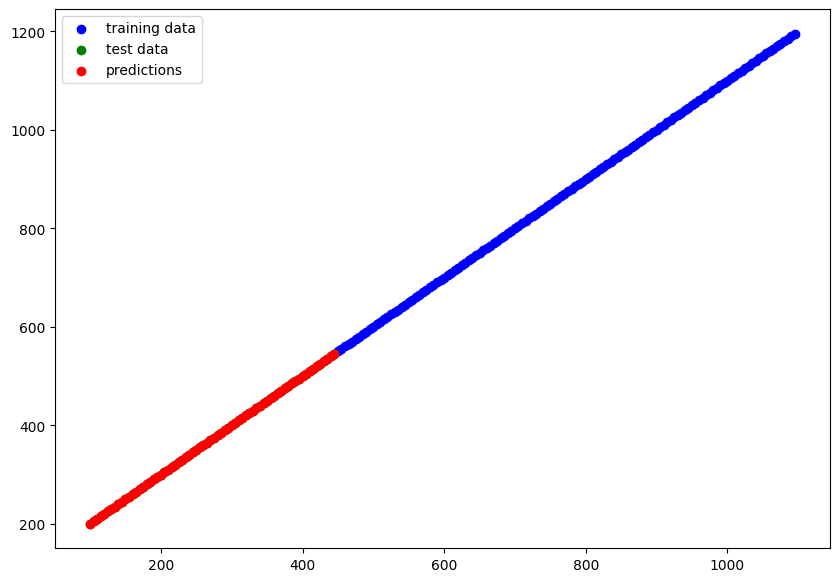

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=x_reg_test, y=y_reg_test, c="b", label="training data")
plt.scatter(x=x_reg_train, y=y_reg_train, c="g", label="test data")
plt.scatter(x=x_reg_train, y=y_reg_train, c="r", label="predictions")
plt.legend()
plt.plot(x_reg_test, m3.predict(x_reg_test))

The missing piece: non-linearity

In [ ]:
tf.random.set_seed(42)

m4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

m4.compile(loss="binary_crossentropy",
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          metrics=["accuracy"])

m4.fit(x,y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4824 - loss: 4.6928
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4509 - loss: 4.5016 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4146 - loss: 4.3897
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4009 - loss: 4.2760 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3899 - loss: 4.1755
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3851 - loss: 4.0365
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3892 - loss: 3.8911 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3950 - loss: 3.7152 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4004 - loss: 3.5504
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4030 - loss: 3.3565
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4060 - loss: 3.2282
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

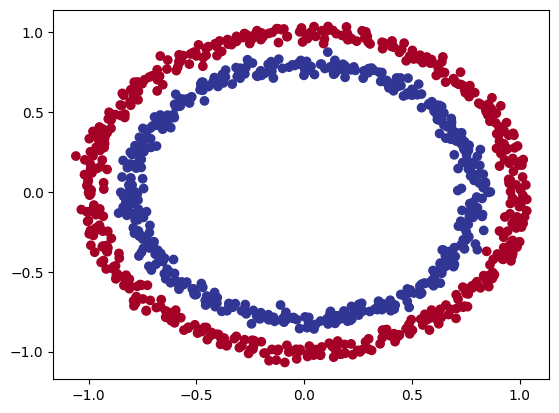

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0], y=x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# check the decision boundary for our latest model
plot_decision_boundary(m4,
                       x=x,
                       y=y)

with non-linear activation function

In [ ]:
tf.random.set_seed(42)

m5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

m5.compile(loss=tf.keras.losses.BinaryCrossentropy,
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          metrics=["accuracy"])

history = m5.fit(x,y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4567 - loss: 4.6957
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4567 - loss: 4.6165
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4560 - loss: 4.5739
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4527 - loss: 4.5592
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4533 - loss: 4.5459
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4533 - loss: 4.5059
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4602 - loss: 4.4472
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4560 - loss: 4.4414
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4599 - loss: 4.4387 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4601 - loss: 4.4230
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4571 - loss: 4.3977
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [ ]:
# time to replicaate the multi-layer neural network from tensor

tf.random.set_seed(42)

m6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

m6.compile(loss="binary_crossentropy",
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          metrics=["accuracy"])

history = m6.fit(x, y, epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5263 - loss: 0.6962
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5278 - loss: 0.6943
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5279 - loss: 0.6931
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5273 - loss: 0.6920
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5285 - loss: 0.6910
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5295 - loss: 0.6902
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5289 - loss: 0.6894
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5323 - loss: 0.6887
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5487 - loss: 0.6880
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5695 - loss: 0.6872
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5804 - loss: 0.6865
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


(-1.1677683182718437, 1.1360036756154805)

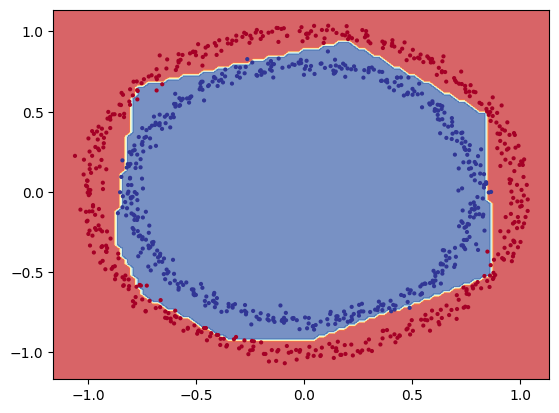

In [ ]:
import numpy as np
def plot_decision_boundary(m6, x, y):
  """
  Plots the decision boundary created by a model predicting x_test
  """

    # define the axis boundaries of the plot and create a meshgrid
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100))

    # create x value
x_in = np.c_[xx.ravel(), yy.ravel()]

    # make predictions
y_pred = m6.predict(x_in)

    # check for multi-class
if len(y_pred[0]) > 1:
  print("doing multiclass classification")
  y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
else:
  print("doing binary classification")
  y_pred = np.round(y_pred).reshape(xx.shape)

# plotting
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(x[:, 0], x[:, 1], c=y, s=4, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
plot_decision_boundary(m6,
                       x,
                       y)

NameError: name 'plot_decision_boundary' is not defined

In [ ]:
tf.random.set_seed(42)

m7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

m7.compile(loss="binary_crossentropy",
           optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          metrics=["accuracy"])

history = m7.fit(x, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4880 - loss: 0.6914
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5041 - loss: 0.6907 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5149 - loss: 0.6903
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5127 - loss: 0.6898
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5064 - loss: 0.6895
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5127 - loss: 0.6890
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5133 - loss: 0.6886
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5142 - loss: 0.6882 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5191 - loss: 0.6878
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5219 - loss: 0.6874 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5289 - loss: 0.6869
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

In [ ]:
m7.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9850 - loss: 0.2757  


[0.2709161341190338, 0.984000027179718]

In [ ]:
m7.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76 (308.00 B)

In [ ]:
# plot_decision_boundary(m7, x, y)
plot_decision_boundary(m7,x=x,y=y)

In [ ]:
# create a toy a tensor (similar to the data we pass into our model)
a = tf.cast(tf.range(-10, 10), tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

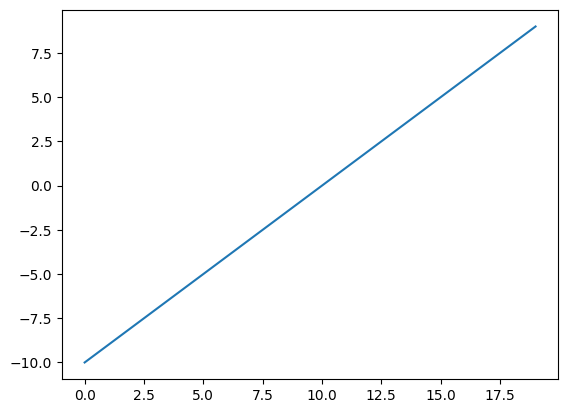

In [ ]:
plt.plot(a)

In [ ]:
# lets start by replicating sigmoid -sigmoid(x)=1/(1+exp(-x))

def sigmoid(x):
  return 1/(1 + tf.exp(-x))
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

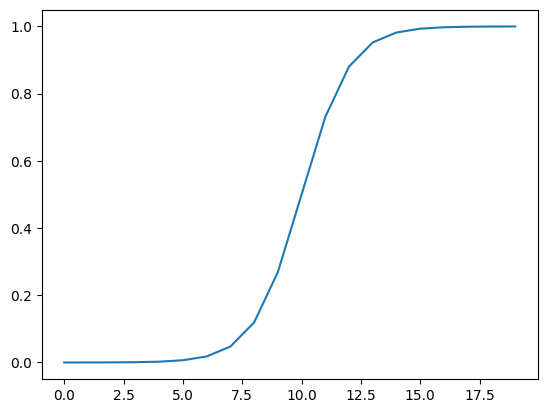

In [ ]:
plt.plot(sigmoid(a))

In [ ]:
# lets recreate the relu function

def relu(x):
  return tf.maximum(0,x)
relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

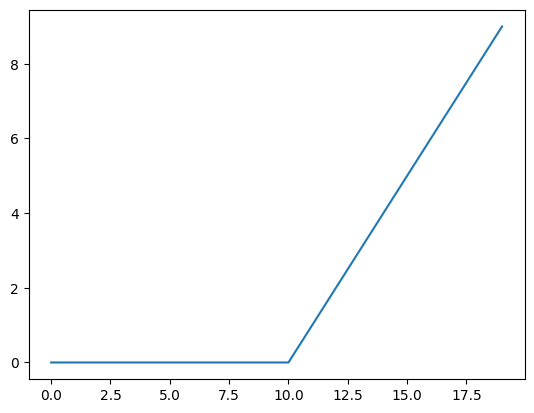

In [ ]:
plt.plot(relu(a))

In [ ]:
# lets recreate the linear function

tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
a == tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

evaluaing and improving classification

In [ ]:
len(x)

50

In [ ]:
x, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
x_train, y_train= x[:25],y[:25]
x_test, y_test = x[25:],y[25:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((25, 2), (25,), (975, 2), (975,))

In [ ]:
tf.random.set_seed(42)

m8 =tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

m8.compile(loss="binary_crossentropy",
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          metrics=["accuracy"])

history = m8.fit(x_train, y_train, epochs=25)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4800 - loss: 0.6888
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6800 - loss: 0.6885
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6800 - loss: 0.6881
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6800 - loss: 0.6878
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6800 - loss: 0.6874
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7200 - loss: 0.6871
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7200 - loss: 0.6868
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7200 - loss: 0.6864
Epoch 9/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7200 - loss: 0.6861
Epoch 10/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7200 - loss: 0.6857
Epoch 11/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7200 - loss: 0.6853
Epoch 12/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7200 - loss: 0.6849
Epo

In [ ]:
m8.evaluate(x_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5200 - loss: 0.6943


[0.6948331594467163, 0.5097435712814331]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


(-1.1677683182718437, 1.1360036756154805)

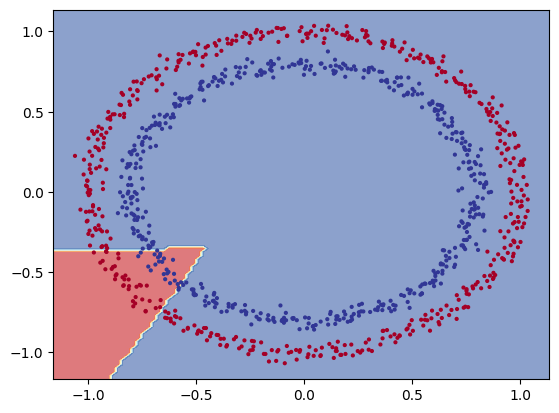

In [ ]:
# plot_decision_boundary(m8, x=x, y=y)
import numpy as np
def plot_decision_boundary(m8, x, y):
  """
  Plots the decision boundary created by a model predicting x_test
  """

    # define the axis boundaries of the plot and create a meshgrid
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100))

    # create x value
x_in = np.c_[xx.ravel(), yy.ravel()]

    # make predictions
y_pred = m8.predict(x_in)

    # check for multi-class
if len(y_pred[0]) > 1:
  print("doing multiclass classification")
  y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
else:
  print("doing binary classification")
  y_pred = np.round(y_pred).reshape(xx.shape)

# plotting
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(x[:, 0], x[:, 1], c=y, s=4, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


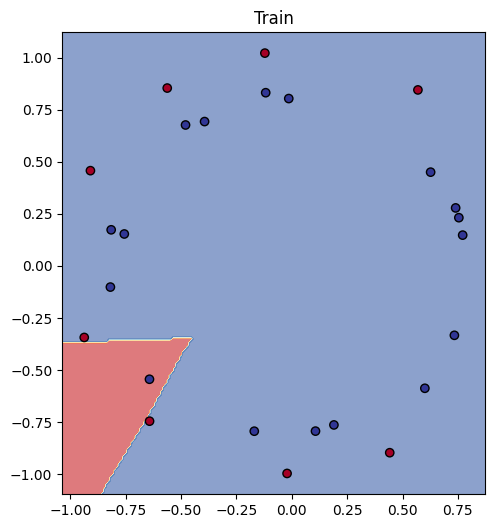

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


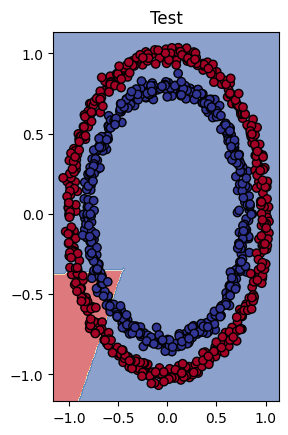

In [ ]:
# plot the figure

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(m8, x_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(m8, x_test, y_test)
plt.show()

In [ ]:
history.history

NameError: name 'history' is not defined

In [ ]:
import pandas as pd
# convert history object into a dataframe
pd.DataFrame(history.history)

NameError: name 'history' is not defined

In [ ]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")


NameError: name 'history' is not defined